# Assignment 3

The assignment 3 contains 1 question and the due date is April 28th (Sunday) 23:59PM. If you have trouble in installing tensorflow in your computer, you may consider using Google Colab for this assignment.

## Question 1 How Yelp Uses Deep Learning to Classify Business Photos? (100 points)

Yelp hosts tens of millions of photos uploaded by Yelpers from all around the world. The wide variety of these photos provides a rich window into local businesses, a window we’re only just peeking through today.

One way we’re trying to open that window is by developing a photo understanding system which allows us to create semantic data about individual photographs. The data generated by the system has been powering our recent launch of tabbed photo browsing as well as our first attempts at content-based photo diversification.

You can check more details about Yelp's practices at [here](https://engineeringblog.yelp.com/2015/10/how-we-use-deep-learning-to-classify-business-photos-at-yelp.html)


![food](https://engineeringblog.yelp.com/images/posts/2015-10-14-photo-classification/image02.png)


In this question, you will be asked to building a Photo Classifier.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from PIL import Image
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50, MobileNet, EfficientNetB0
from tensorflow.keras.layers import BatchNormalization
import time

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's first upload the file images.npy and labels.npy and load the images dataset.

In [3]:
images = np.load('/content/drive/MyDrive/Assignment3_DL_2324/images.npy') # SHAPE: (1024, 256, 256, 3) -> (N_SAMPLES, HEIGHT, WIDTH, CHANNELS)
labels = np.load('/content/drive/MyDrive/Assignment3_DL_2324/labels.npy') # SHAPE: (1024,) -> (N_SAMPLES,). Label encoded: 0, 1, 2, 3

print('Images shape:', images.shape)
print('Labels shape:', labels.shape)
print('Labels match the image at the respective 0 to 1024 position.')

Images shape: (1024, 256, 256, 3)
Labels shape: (1024,)
Labels match the image at the respective 0 to 1024 position.


There are four types of the images on Yelp: Food, Drink, Interior and Exterior

In [4]:
np.unique(labels)

array([0, 1, 2, 3])

We visualize some random images from the dataset below:

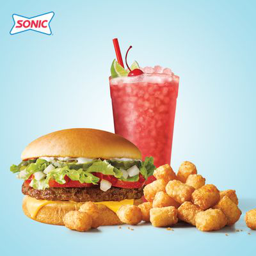

In [5]:
# food: class 0

Image.fromarray(images[5])

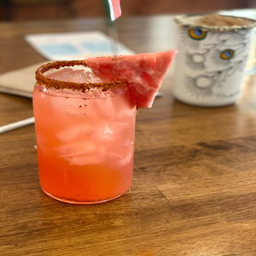

In [6]:
# drink: class 1

Image.fromarray(images[3])

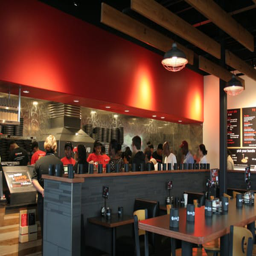

In [7]:
# interior: class 2

Image.fromarray(images[7])

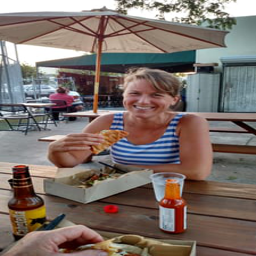

In [8]:
# exterior: class 3

Image.fromarray(images[8])

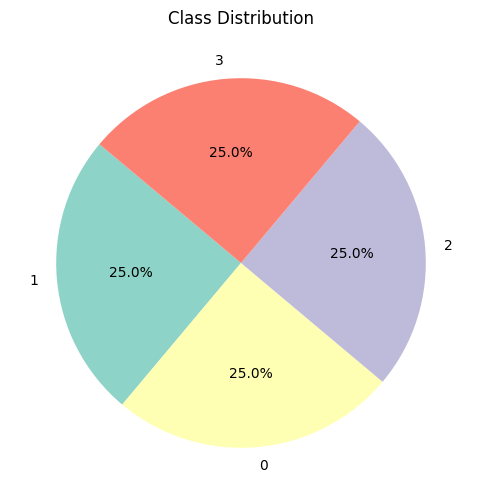

In [9]:
# Looking at class balance

# Calculate class distribution
class_distribution = pd.Series(labels).value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.title('Class Distribution')
sns.set_palette('Set3') # Setting color palette
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.show()


### Question 1.1 Training a deep neural network (15 points)

Practice training a deep neural network on the Yelp image dataset


Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the dataset. Donot forget define your input and output layers.

Train the model for 100 epochs and use test set as the validation data during the training, explain how many parameters does the model have and whether the model will experience overfitting. You may consider plotting the losses and accuracy over epochs.

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.2, random_state=42)

In [6]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

# Define input and output layers
input_shape = X_train.shape[1:]
output_shape = len(np.unique(y_train))

# Define the model
model = Sequential()

# Add input layer
model.add(Flatten(input_shape=input_shape))

# Add hidden layers
for _ in range(20):
    model.add(Dense(100, activation='relu'))

# Add output layer
model.add(Dense(output_shape, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Print model summary to see the number of parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 100)               19660900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)              

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
26/26 [==============================] - 7s 30ms/step - loss: 11.0862 - accuracy: 0.2247 - val_loss: 4.3207 - val_accuracy: 0.2927
Epoch 2/100
26/26 [==============================] - 0s 15ms/step - loss: 2.4011 - accuracy: 0.2479 - val_loss: 1.4386 - val_accuracy: 0.2780
Epoch 3/100
26/26 [==============================] - 0s 15ms/step - loss: 1.4955 - accuracy: 0.2601 - val_loss: 1.4323 - val_accuracy: 0.2439
Epoch 4/100
26/26 [==============================] - 0s 14ms/step - loss: 1.4250 - accuracy: 0.2393 - val_loss: 1.4096 - val_accuracy: 0.2439
Epoch 5/100
26/26 [==============================] - 0s 16ms/step - loss: 1.3487 - accuracy: 0.2991 - val_loss: 1.5471 - val_accuracy: 0.2976
Epoch 6/100
26/26 [==============================] - 0s 15ms/step - loss: 1.4024 - accuracy: 0.3248 - val_loss: 1.3507 - val_accuracy: 0.3463
Epoch 7/100
26/26 [==============================] - 0s 15ms/step - loss: 1.2666 - accuracy: 0.3944 - val_loss: 1.4765 - val_accuracy: 0.2976
Epoch

In [10]:
# Setting up function to reuse later
def plot_history(history, whole_plot=0):
    # Plot the history
    plt.figure(figsize=(8, 5))
    if whole_plot == 0:
        plt.gca().set_ylim(0, 3)

    # Plot training loss with color 'blue'
    plt.plot(history.history['loss'], label='Training Loss', color='blue')

    # Plot validation loss with color 'red'
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

    # Plot training accuracy with color 'green'
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')

    # Plot validation accuracy with color 'orange'
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

    plt.grid(True)
    plt.legend()
    plt.show()

    print("Final Training Accuracy:", history.history['accuracy'][-1])
    print("Final Validation Accuracy:", history.history['val_accuracy'][-1])


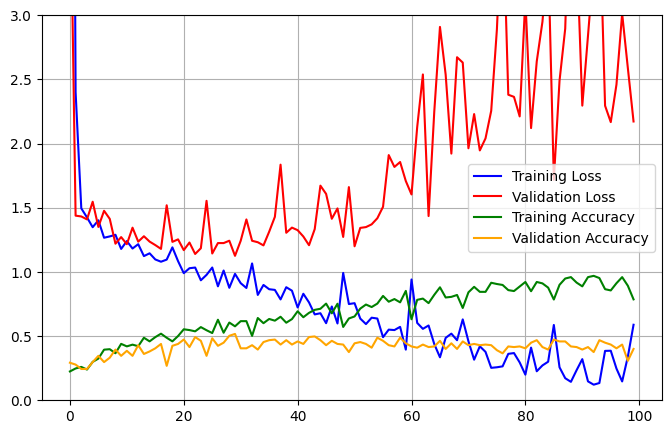

Final Training Accuracy: 0.7863247990608215
Final Validation Accuracy: 0.4000000059604645


In [23]:
plot_history(history)

As we can determine, this model has a total of 19 853 204 parameters, all of them trainable. This number comes fro the following layers:


**Flatten Layer**: This layer does not have any trainable parameters. It simply reshapes the input into a 1D array.
No parameters.


**Dense Layers (Hidden Layers)**: Each dense layer has two types of parameters:
 - Weights: Each neuron in the layer is connected to every neuron in the previous layer. Therefore, the number of weights in each dense layer is equal to the number of neurons in the previous layer multiplied by the number of neurons in the current layer.
 - Biases: Each neuron has a bias term.

In this model, there are 20 dense layers with 100 neurons each. Therefore, each dense layer has:
 - Weights: 100 * (Number of neurons in the previous layer) weights
 - Biases: 100 bias terms

Total parameters in each dense layer = (Number of neurons in the previous layer) * 100 (weights) + 100 (biases)


**Output Layer**: The output layer is also a dense layer, but with a different number of neurons corresponding to the number of classes in the classification task.
Weights: Number of neurons in the previous layer * Number of neurons in the output layer
Biases: Number of neurons in the output layer


**Total Parameters**: To calculate the total number of parameters in the model, we sum up the parameters in all layers.

The large number of parameters in this model (20 hidden layers of 100 neurons each) increases the risk of overfitting, especially if the dataset is relatively small (1025 samples). Looking at the plot, we can also observe overfitting after some epoch, where the validation loss stops decreasing with the training loss, and eventually it starts to increase as the model starts to overfit.

### Question 1.2 (25 points)

Try reduce the overfitting and improve the model performance. You can try the bag of tricks to the model from the class. This may include one or more techniques such as **weight regularization**, **batch normalization**, **dropout**, **Early stopping**, etc. You should perform ``ablation study``, a common techniqued used in machine learning community to show the effectivess of the introduced technique. In other words, show your step-by-step improvement by including these techniques and repeat the repeat the previous training process. Explain whether and how these techniques help achieve a better result. You may consider stopping improving the model by making it at least 10% better than the previous model architecture.

The final validation accuracy of the previous architecture is 0.4, the goal is to improve this number. First I will apply several techniques to check how they effect the model performance and select the promising ones.

First techinque: Batch normalization

Batch normalization is a technique used to improve the training stability and speed of deep neural networks by normalizing the activations of each layer within mini-batches. It helps mitigate overfitting by reducing internal covariate shift and enabling higher learning rates during training.

In [15]:
# Batch normalization
# Define the model
model_b = Sequential()

# Add input layer
model_b.add(Flatten(input_shape=input_shape))

# Add hidden layers
for _ in range(20):
    model_b.add(Dense(100, activation='relu'))
    keras.layers.BatchNormalization()

# Add output layer
model_b.add(Dense(output_shape, activation='softmax'))

# Compile the model
model_b.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [16]:
# Train the model
history_b = model_b.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
26/26 [==============================] - 6s 27ms/step - loss: 7.0770 - accuracy: 0.2454 - val_loss: 10.2599 - val_accuracy: 0.2780
Epoch 2/100
26/26 [==============================] - 0s 15ms/step - loss: 3.5663 - accuracy: 0.2344 - val_loss: 1.4270 - val_accuracy: 0.2585
Epoch 3/100
26/26 [==============================] - 0s 15ms/step - loss: 1.8586 - accuracy: 0.2613 - val_loss: 1.5464 - val_accuracy: 0.2146
Epoch 4/100
26/26 [==============================] - 0s 14ms/step - loss: 1.5848 - accuracy: 0.2271 - val_loss: 1.5019 - val_accuracy: 0.2439
Epoch 5/100
26/26 [==============================] - 0s 14ms/step - loss: 1.4182 - accuracy: 0.2393 - val_loss: 1.4782 - val_accuracy: 0.2390
Epoch 6/100
26/26 [==============================] - 0s 14ms/step - loss: 1.3824 - accuracy: 0.2759 - val_loss: 1.4040 - val_accuracy: 0.2195
Epoch 7/100
26/26 [==============================] - 0s 15ms/step - loss: 1.3250 - accuracy: 0.3394 - val_loss: 1.4848 - val_accuracy: 0.2732
Epoch

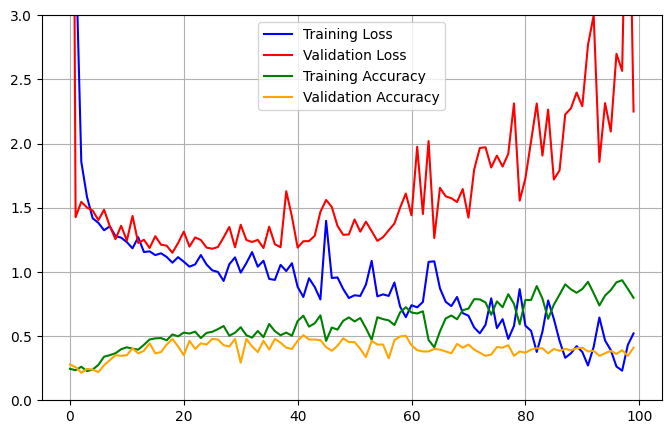

Final Training Accuracy: 0.7985348105430603
Final Validation Accuracy: 0.4097560942173004


In [24]:
plot_history(history_b)

Second technique: Dropout layer

The dropout layer is a regularization technique that randomly deactivates a fraction of neurons during training, preventing the network from relying too heavily on specific neurons or features. By effectively reducing co-adaptation between neurons, dropout helps prevent overfitting and promotes generalization in the model.

In [13]:
# Testing dropout after every layer
from tensorflow.keras.layers import Dropout
# Dropout
# Define the model
model_d = Sequential()

# Add input layer
model_d.add(Flatten(input_shape=input_shape))

# Add hidden layers
for _ in range(20):
    model_d.add(Dense(100, activation='relu'))
    model_d.add(Dropout(0.1))

# Add output layer
model_d.add(Dense(output_shape, activation='softmax'))

# Compile the model
model_d.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [14]:
# Train the model
history_d = model_d.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
26/26 [==============================] - 6s 30ms/step - loss: 7.1339 - accuracy: 0.2601 - val_loss: 1.4009 - val_accuracy: 0.1902
Epoch 2/100
26/26 [==============================] - 0s 17ms/step - loss: 1.7780 - accuracy: 0.2454 - val_loss: 1.3872 - val_accuracy: 0.3122
Epoch 3/100
26/26 [==============================] - 0s 17ms/step - loss: 1.6102 - accuracy: 0.2601 - val_loss: 1.3857 - val_accuracy: 0.2829
Epoch 4/100
26/26 [==============================] - 0s 16ms/step - loss: 1.4856 - accuracy: 0.2454 - val_loss: 1.3833 - val_accuracy: 0.2927
Epoch 5/100
26/26 [==============================] - 0s 16ms/step - loss: 1.4527 - accuracy: 0.2747 - val_loss: 1.3767 - val_accuracy: 0.2878
Epoch 6/100
26/26 [==============================] - 0s 16ms/step - loss: 1.4326 - accuracy: 0.2833 - val_loss: 1.3772 - val_accuracy: 0.3220
Epoch 7/100
26/26 [==============================] - 0s 17ms/step - loss: 1.4584 - accuracy: 0.2564 - val_loss: 1.3803 - val_accuracy: 0.3122
Epoch 

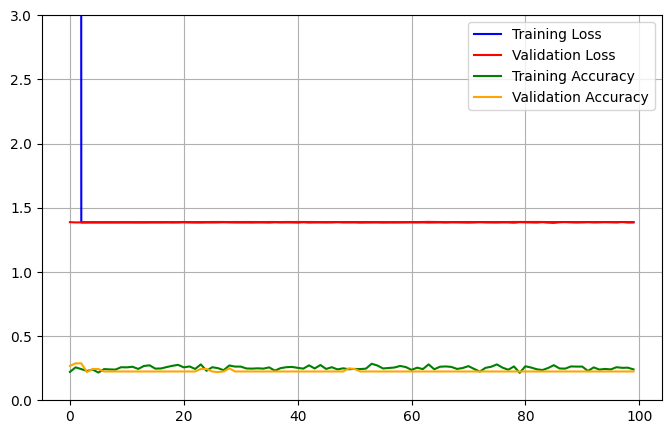

Final Training Accuracy: 0.24053724110126495
Final Validation Accuracy: 0.22439023852348328


In [28]:
plot_history(history_d)

A dropout layer after every dense layer seems too much, however only one layer yields better results:

In [9]:
# Testing dropout after last layer
# Dropout
# Define the model
model_dl = Sequential()

# Add input layer
model_dl.add(Flatten(input_shape=input_shape))

# Add hidden layers
for _ in range(20):
    model_dl.add(Dense(100, activation='relu'))

# Add dropout layer
model_dl.add(Dropout(0.5))

# Add output layer
model_dl.add(Dense(output_shape, activation='softmax'))

# Compile the model
model_dl.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [11]:
# Train the model
history_dl = model_dl.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
26/26 [==============================] - 8s 31ms/step - loss: 5.5593 - accuracy: 0.2381 - val_loss: 1.4206 - val_accuracy: 0.2293
Epoch 2/100
26/26 [==============================] - 0s 16ms/step - loss: 1.5269 - accuracy: 0.2491 - val_loss: 1.3993 - val_accuracy: 0.2585
Epoch 3/100
26/26 [==============================] - 0s 15ms/step - loss: 1.4765 - accuracy: 0.2369 - val_loss: 1.3805 - val_accuracy: 0.2488
Epoch 4/100
26/26 [==============================] - 0s 15ms/step - loss: 1.4582 - accuracy: 0.2723 - val_loss: 1.3787 - val_accuracy: 0.3073
Epoch 5/100
26/26 [==============================] - 0s 15ms/step - loss: 1.4165 - accuracy: 0.2723 - val_loss: 1.4068 - val_accuracy: 0.2634
Epoch 6/100
26/26 [==============================] - 0s 15ms/step - loss: 1.3960 - accuracy: 0.2625 - val_loss: 1.3846 - val_accuracy: 0.3171
Epoch 7/100
26/26 [==============================] - 0s 15ms/step - loss: 1.4023 - accuracy: 0.2589 - val_loss: 1.3902 - val_accuracy: 0.2585
Epoch 

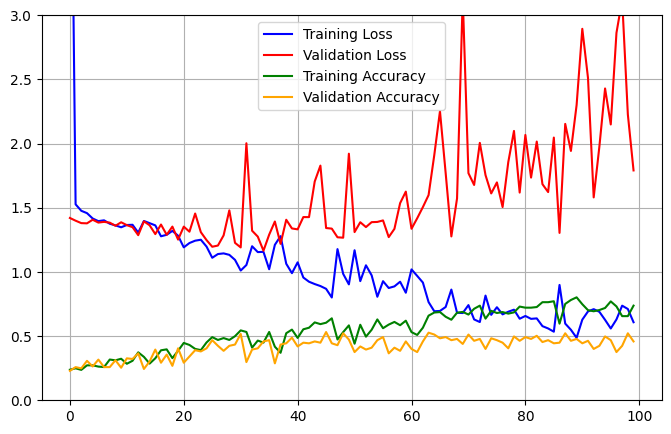

Final Training Accuracy: 0.7374847531318665
Final Validation Accuracy: 0.4585365951061249


In [12]:
plot_history(history_dl)

Third technique: L1 regularization

L1 regularization, also known as Lasso regularization, penalizes the absolute values of the weights in the model, encouraging sparsity in the learned features. By imposing sparsity on the model parameters, L1 regularization helps prevent overfitting by reducing the model's complexity and promoting simpler solutions. This method proves to be unsuccesful, as both training and validation accuracy reamain on a low level during the training process.

In [16]:
# l1 regularization
# Define the model
model_l1 = Sequential()

# Add input layer
model_l1.add(Flatten(input_shape=input_shape))

# Add hidden layers with L1 regularization
for _ in range(20):
    model_l1.add(Dense(100, activation='relu', kernel_regularizer=l1(0.01)))  # L1 regularization with strength 0.01

# Add output layer
model_l1.add(Dense(output_shape, activation='softmax'))

# Compile the model
model_l1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [17]:
# Train the model
history_l1 = model_l1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
26/26 [==============================] - 6s 37ms/step - loss: 272.1836 - accuracy: 0.2454 - val_loss: 166.0056 - val_accuracy: 0.2878
Epoch 2/100
26/26 [==============================] - 0s 19ms/step - loss: 136.5049 - accuracy: 0.2308 - val_loss: 111.0078 - val_accuracy: 0.2439
Epoch 3/100
26/26 [==============================] - 1s 20ms/step - loss: 95.0206 - accuracy: 0.2515 - val_loss: 78.9258 - val_accuracy: 0.2439
Epoch 4/100
26/26 [==============================] - 1s 20ms/step - loss: 66.9603 - accuracy: 0.2515 - val_loss: 55.2774 - val_accuracy: 0.2439
Epoch 5/100
26/26 [==============================] - 1s 19ms/step - loss: 46.5676 - accuracy: 0.2515 - val_loss: 39.2818 - val_accuracy: 0.2439
Epoch 6/100
26/26 [==============================] - 1s 20ms/step - loss: 33.7073 - accuracy: 0.2515 - val_loss: 29.3370 - val_accuracy: 0.2439
Epoch 7/100
26/26 [==============================] - 0s 19ms/step - loss: 27.9068 - accuracy: 0.2442 - val_loss: 26.6704 - val_accur

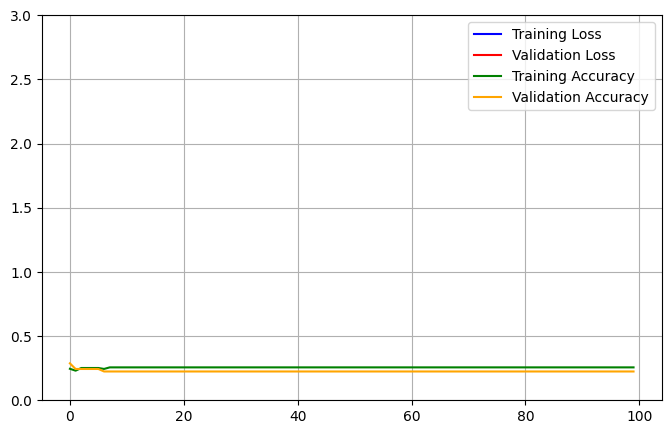

Final Training Accuracy: 0.25641027092933655
Final Validation Accuracy: 0.22439023852348328


In [18]:
plot_history(history_l1)

Fourth technique: L2 regularization

L2 regularization, also known as Ridge regularization, penalizes the squared values of the weights in the model, discouraging large weight values and promoting smoother decision boundaries. By penalizing large weights, L2 regularization helps prevent overfitting by constraining the model's capacity and reducing its sensitivity to individual data points.

In [7]:
# Define the model
model_l2 = Sequential()

# Add input layer
model_l2.add(Flatten(input_shape=input_shape))

# Add hidden layers with L2 regularization
for _ in range(20):
    model_l2.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization with strength 0.01

# Add output layer
model_l2.add(Dense(output_shape, activation='softmax'))

# Compile the model
model_l2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [8]:
# Train the model
history_l2 = model_l2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
26/26 [==============================] - 8s 37ms/step - loss: 27.2139 - accuracy: 0.2430 - val_loss: 19.8171 - val_accuracy: 0.2244
Epoch 2/100
26/26 [==============================] - 0s 18ms/step - loss: 17.8838 - accuracy: 0.2711 - val_loss: 16.1402 - val_accuracy: 0.2439
Epoch 3/100
26/26 [==============================] - 0s 19ms/step - loss: 14.9307 - accuracy: 0.3480 - val_loss: 13.8689 - val_accuracy: 0.3659
Epoch 4/100
26/26 [==============================] - 0s 19ms/step - loss: 13.1782 - accuracy: 0.3919 - val_loss: 12.6898 - val_accuracy: 0.2732
Epoch 5/100
26/26 [==============================] - 0s 19ms/step - loss: 12.0829 - accuracy: 0.3895 - val_loss: 11.9730 - val_accuracy: 0.2976
Epoch 6/100
26/26 [==============================] - 0s 19ms/step - loss: 11.4609 - accuracy: 0.3810 - val_loss: 11.1924 - val_accuracy: 0.3561
Epoch 7/100
26/26 [==============================] - 0s 19ms/step - loss: 10.9222 - accuracy: 0.4115 - val_loss: 10.7169 - val_accuracy:

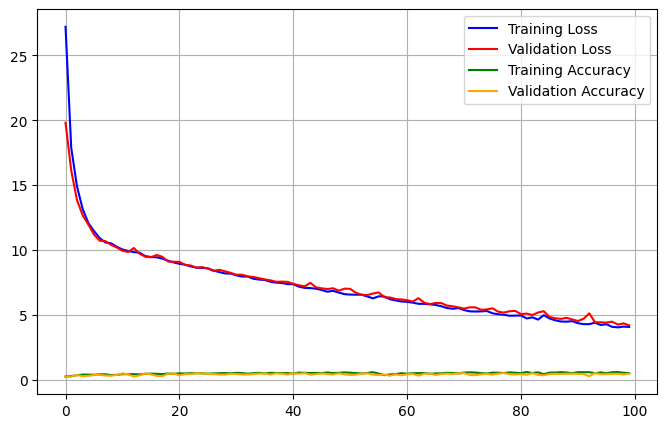

Final Training Accuracy: 0.5018315315246582
Final Validation Accuracy: 0.4682926833629608


In [11]:
plot_history(history_l2, 1)

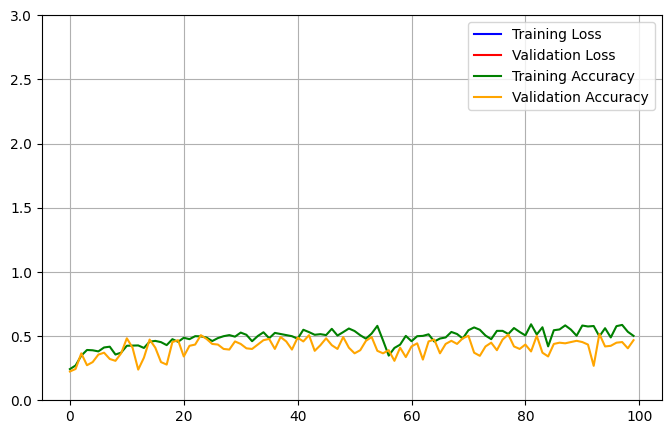

Final Training Accuracy: 0.5018315315246582
Final Validation Accuracy: 0.4682926833629608


In [12]:
plot_history(history_l2)

By checking multiple l2 values, it seems that smaller penalties work better, and the best option remains the 0.01 value, where after a 100 epochs the training and validation losses are still declining, and maybe the accuracy would improve even more with more epochs.

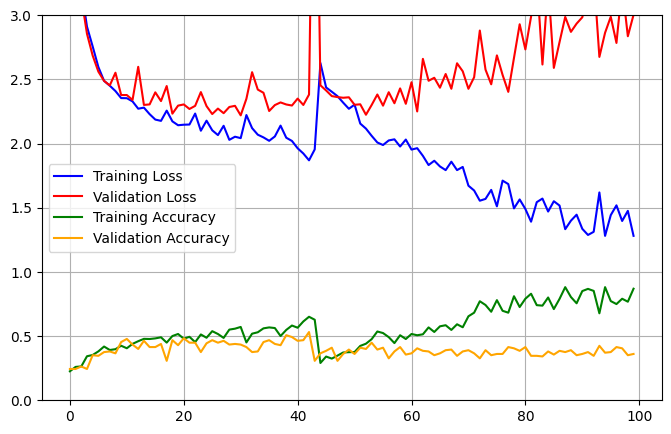

Final Training Accuracy: 0.8693528771400452
Final Validation Accuracy: 0.36097562313079834


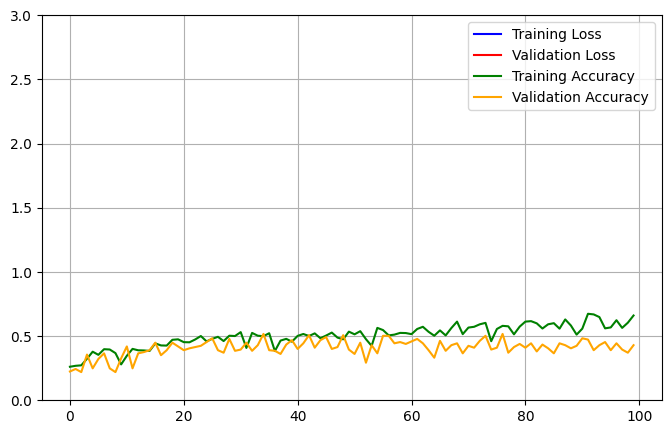

Final Training Accuracy: 0.6605616807937622
Final Validation Accuracy: 0.4292683005332947


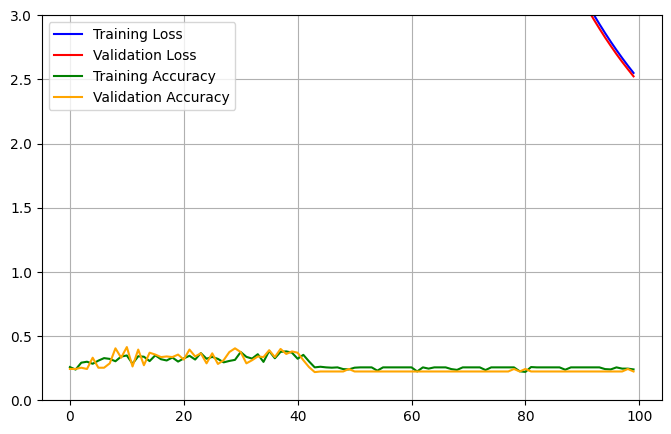

Final Training Accuracy: 0.24053724110126495
Final Validation Accuracy: 0.22439023852348328


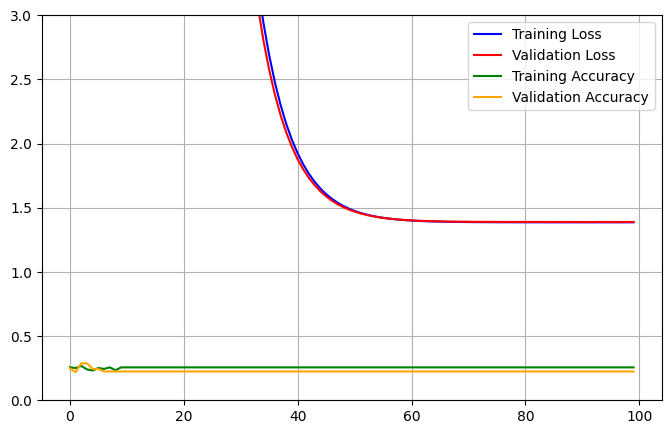

Final Training Accuracy: 0.25641027092933655
Final Validation Accuracy: 0.22439023852348328


In [23]:
# Multiple l2 values
# Strength values to try
l2_strengths = [0.001, 0.01, 0.1, 1.0]

# Dictionary to store training histories
histories_l2 = {}

# Loop over L2 strengths
for strength in l2_strengths:
    # Define the model
    model_l2 = Sequential()

    # Add input layer
    model_l2.add(Flatten(input_shape=input_shape))

    # Add hidden layers with L2 regularization
    for _ in range(20):
        model_l2.add(Dense(100, activation='relu', kernel_regularizer=l2(strength)))  # L2 regularization

    # Add output layer
    model_l2.add(Dense(output_shape, activation='softmax'))

    # Compile the model
    model_l2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # Train the model
    history_l2 = model_l2.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), verbose=0)

    # Plot training history
    plot_history(history_l2)

    # Store training history
    histories_l2[strength] = history_l2

Combining l2 regularization and a dropout layer yielded slightly worse accuracy than just l2 rehularization or dropout, however the declining trend of validation loss after 100 epochs suggest that there is maybe room for improvement, and the model is still learning (increasing the number of epochs is out of scope in this study):

In [8]:
# Combining multiple approaches
# Define the model
model_l2_dropout = Sequential()

# Add input layer
model_l2_dropout.add(Flatten(input_shape=input_shape))

# Add hidden layers with L2 regularization
for _ in range(20):
    model_l2_dropout.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization

# Add dropout layer
model_l2_dropout.add(Dropout(0.5))

# Add output layer
model_l2_dropout.add(Dense(output_shape, activation='softmax'))

# Compile the model
model_l2_dropout.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Print model summary
model_l2_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_21 (Dense)            (None, 100)               19660900  
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 100)              

In [9]:
# Train the model
history_l2_dropout = model_l2_dropout.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
26/26 [==============================] - 8s 37ms/step - loss: 23.1769 - accuracy: 0.2601 - val_loss: 19.8699 - val_accuracy: 0.2195
Epoch 2/100
26/26 [==============================] - 0s 18ms/step - loss: 17.6539 - accuracy: 0.2845 - val_loss: 15.4079 - val_accuracy: 0.2439
Epoch 3/100
26/26 [==============================] - 0s 18ms/step - loss: 14.0024 - accuracy: 0.2369 - val_loss: 12.6923 - val_accuracy: 0.2439
Epoch 4/100
26/26 [==============================] - 0s 18ms/step - loss: 11.8880 - accuracy: 0.2576 - val_loss: 11.1313 - val_accuracy: 0.2488
Epoch 5/100
26/26 [==============================] - 0s 18ms/step - loss: 10.6412 - accuracy: 0.2808 - val_loss: 10.1793 - val_accuracy: 0.3024
Epoch 6/100
26/26 [==============================] - 0s 18ms/step - loss: 9.8616 - accuracy: 0.3223 - val_loss: 9.5575 - val_accuracy: 0.2390
Epoch 7/100
26/26 [==============================] - 0s 18ms/step - loss: 9.3178 - accuracy: 0.3053 - val_loss: 9.1094 - val_accuracy: 0.2

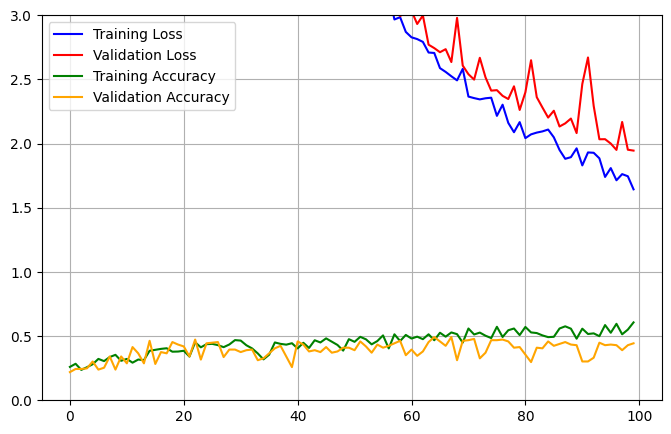

Final Training Accuracy: 0.6068376302719116
Final Validation Accuracy: 0.4439024329185486


In [10]:
plot_history(history_l2_dropout)

Batch normalization combined with l2 regularization is also a worse solution, the validation loss becomes very volatile, and the validation accuracy is declining:

In [16]:
# Define the model
model_l2_batchnorm = Sequential()

# Add input layer
model_l2_batchnorm.add(Flatten(input_shape=input_shape))

# Add hidden layers with L2 regularization and BatchNormalization
for _ in range(20):
    model_l2_batchnorm.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
    model_l2_batchnorm.add(BatchNormalization())  # BatchNormalization layer

# Add output layer
model_l2_batchnorm.add(Dense(output_shape, activation='softmax'))

# Compile the model
model_l2_batchnorm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Print model summary
model_l2_batchnorm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 100)               19660900  
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 100)               1

In [17]:
history_l2_batchnorm = model_l2_batchnorm.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
26/26 [==============================] - 15s 57ms/step - loss: 25.9965 - accuracy: 0.2576 - val_loss: 27.9400 - val_accuracy: 0.2244
Epoch 2/100
26/26 [==============================] - 1s 30ms/step - loss: 28.7054 - accuracy: 0.2527 - val_loss: 28.6316 - val_accuracy: 0.2244
Epoch 3/100
26/26 [==============================] - 1s 31ms/step - loss: 28.7119 - accuracy: 0.2747 - val_loss: 28.4618 - val_accuracy: 0.2195
Epoch 4/100
26/26 [==============================] - 1s 31ms/step - loss: 28.3897 - accuracy: 0.3016 - val_loss: 28.2022 - val_accuracy: 0.2195
Epoch 5/100
26/26 [==============================] - 1s 30ms/step - loss: 28.0880 - accuracy: 0.2906 - val_loss: 28.0072 - val_accuracy: 0.3024
Epoch 6/100
26/26 [==============================] - 1s 30ms/step - loss: 27.7062 - accuracy: 0.3297 - val_loss: 28.0925 - val_accuracy: 0.2634
Epoch 7/100
26/26 [==============================] - 1s 30ms/step - loss: 27.3353 - accuracy: 0.3162 - val_loss: 28.0253 - val_accuracy

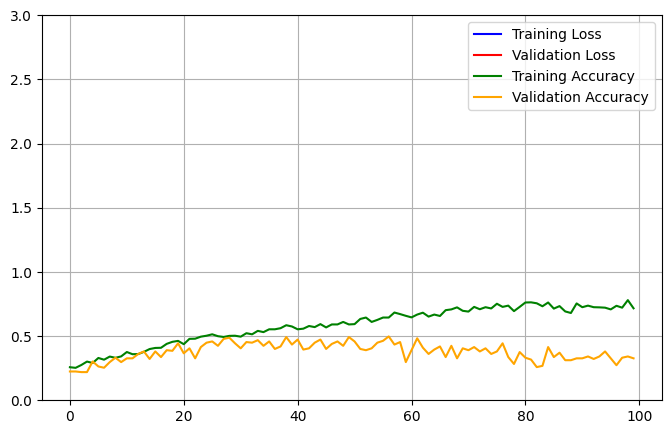

Final Training Accuracy: 0.7167277336120605
Final Validation Accuracy: 0.3268292546272278


In [18]:
plot_history(history_l2_batchnorm)

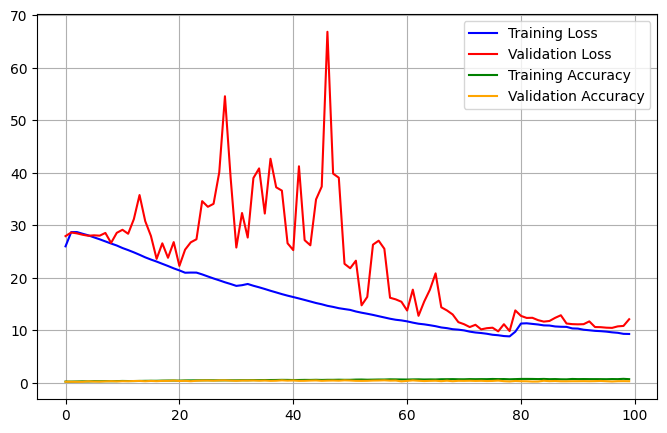

Final Training Accuracy: 0.7167277336120605
Final Validation Accuracy: 0.3268292546272278


In [19]:
plot_history(history_l2_batchnorm, 1)

To conclude the ablation study, the model with L2 regularization with the value of 0.01 proved to be the best, achieving a final validation accuracy of 0.47, which exceeds the expectation of 10% improvement. L2 regularization, also known as Ridge regularization, works by penalizing the squared values of the weights in the model, discouraging large weight values and promoting smoother decision boundaries. This penalty term added to the loss function encourages the model to find simpler solutions by reducing the magnitudes of the weights. In the context of our small dataset, L2 regularization is particularly effective as it helps prevent overfitting by constraining the model's capacity and reducing its sensitivity to individual data points. By promoting smoother decision boundaries, L2 regularization encourages the model to generalize better to unseen data, ultimately leading to improved performance on the validation set.

Given the small dataset size, it's worth considering that implementing data augmentation techniques could potentially boost accuracy. Data augmentation, which involves applying transformations like rotation and flipping to existing images, can enrich the training data, improving the model's ability to generalize and learn robust features, but this is out of scope for this study.

### Question 1.3 Convolutional Neural Network (25 points)

Now, let's define the Convolutional Neural Network.

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model and report your test accuracy. Is it better than the multi-layer perceptron.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define input shape (assuming it's compatible with your images)
input_shape = X_train.shape[1:]
output_shape = len(np.unique(y_train))

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(60, activation='relu'),
    Dropout(0.5),
    Dense(output_shape, activation='softmax')
])

# Compile the model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 21, 21, 128)       0

In [9]:
# Train the model
history_cnn = cnn_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
26/26 [==============================] - 8s 111ms/step - loss: 32.9150 - accuracy: 0.3028 - val_loss: 1.3591 - val_accuracy: 0.3171
Epoch 2/100
26/26 [==============================] - 1s 42ms/step - loss: 1.2808 - accuracy: 0.4322 - val_loss: 1.4859 - val_accuracy: 0.2732
Epoch 3/100
26/26 [==============================] - 1s 42ms/step - loss: 1.1840 - accuracy: 0.4860 - val_loss: 1.3296 - val_accuracy: 0.4146
Epoch 4/100
26/26 [==============================] - 1s 42ms/step - loss: 0.8304 - accuracy: 0.6532 - val_loss: 1.4444 - val_accuracy: 0.3951
Epoch 5/100
26/26 [==============================] - 1s 42ms/step - loss: 0.6619 - accuracy: 0.7485 - val_loss: 1.8946 - val_accuracy: 0.3902
Epoch 6/100
26/26 [==============================] - 1s 42ms/step - loss: 0.4108 - accuracy: 0.8425 - val_loss: 1.9771 - val_accuracy: 0.3902
Epoch 7/100
26/26 [==============================] - 1s 42ms/step - loss: 0.2908 - accuracy: 0.8926 - val_loss: 2.2921 - val_accuracy: 0.3951
Epoc

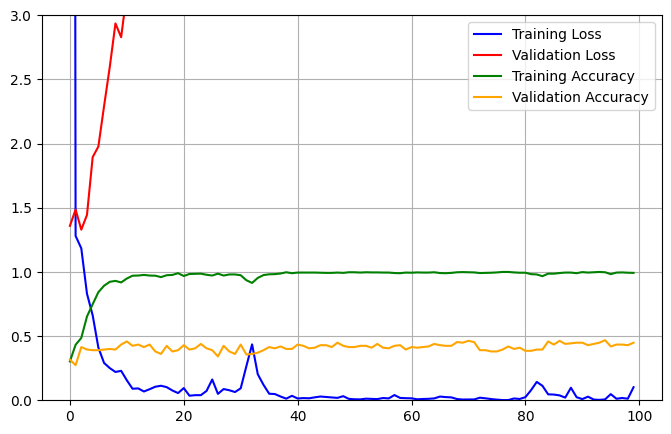

Final Training Accuracy: 0.9926739931106567
Final Validation Accuracy: 0.44878047704696655


In [12]:
plot_history(history_cnn)

The CNN model presented above demonstrates superior accuracy compared to the baseline model, but it also exhibits signs of overfitting, particularly evident in its validation accuracy. Despite its improved performance over the baseline, it falls short of surpassing the enhanced models where overfitting was effectively mitigated. By addressing the overfitting issue through suitable techniques, such as regularization or dropout, further enhancements could be achieved to optimize the model's performance and generalization ability.

### Question 1.4 Transfer learning (35 points)

In this question, we will use the several well-known architectures that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, these architectures have already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks.

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of model, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained models from `tensorflow.keras.applications`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below:

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous model.

Estimate the model and report the accuracy and loss achieved. Explain whether model would benefit from transfer lerarning in comparison to the previous model architectures.

Try to use the following models: VGG16, Inception, ResNet, MobileNet and EfficientNet and compare their performance and running time. Explain which model would work the best.

58889256/58889256 [==============================] - 3s 0us/step
VGG16
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_21 (Dense)            (None, 500)               16384500  
                                                                 
 dense_22 (Dense)            (None, 100)               50100     
                                                                 
 dense_23 (Dense)            (None, 4)                 404       
                                                                 
Total params: 31149692 (118.83 MB)
Trainable params: 16435004 (62.69 MB)
Non-trainable params: 14714688 (56.13 MB)


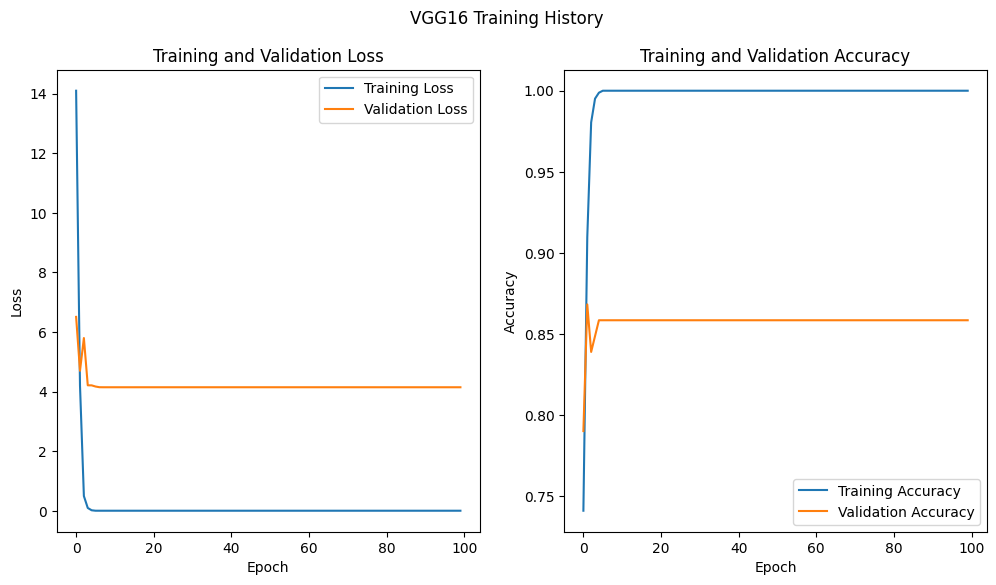

87910968/87910968 [==============================] - 4s 0us/step
Inception
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_24 (Dense)            (None, 500)               36864500  
                                                                 
 dense_25 (Dense)            (None, 100)               50100     
                                                                 
 dense_26 (Dense)            (None, 4)                 404       
                                                                 
Total params: 58717788 (223.99 MB)
Trainable params: 36915004 (140.82 MB)
Non-trainable params: 21802784 (83.17

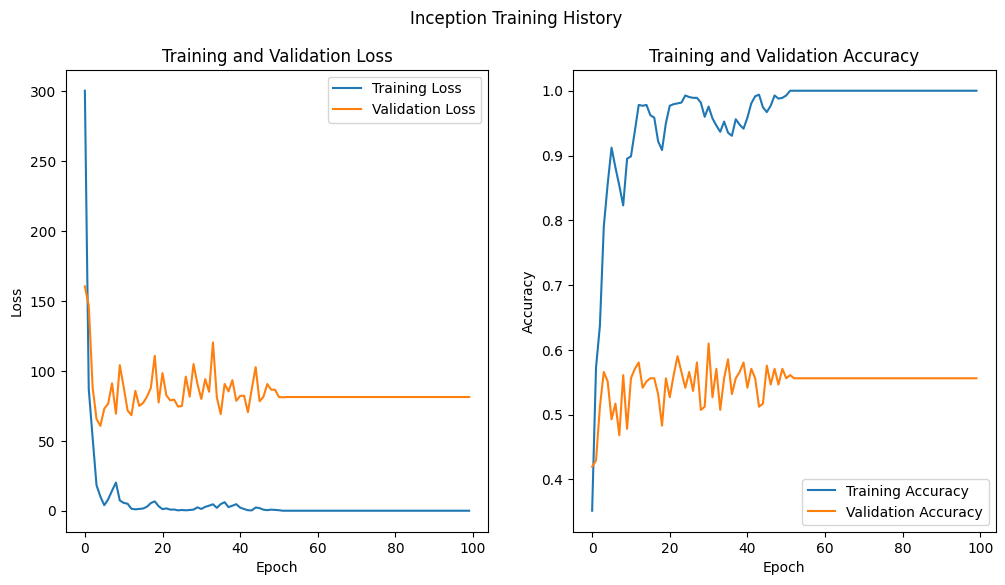

94765736/94765736 [==============================] - 4s 0us/step
ResNet
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_27 (Dense)            (None, 500)               65536500  
                                                                 
 dense_28 (Dense)            (None, 100)               50100     
                                                                 
 dense_29 (Dense)            (None, 4)                 404       
                                                                 
Total params: 89174716 (340.17 MB)
Trainable params: 65587004 (250.19 MB)
Non-trainable params: 23587712 (89.98 MB

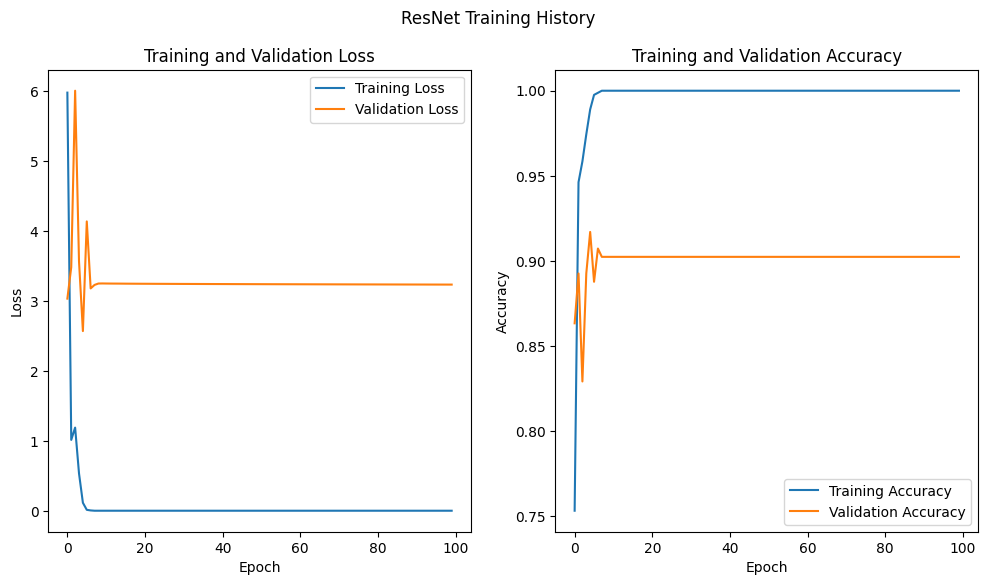

17225924/17225924 [==============================] - 1s 0us/step
MobileNet
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 65536)             0         
                                                                 
 dense_30 (Dense)            (None, 500)               32768500  
                                                                 
 dense_31 (Dense)            (None, 100)               50100     
                                                                 
 dense_32 (Dense)            (None, 4)                 404       
                                                                 
Total params: 36047868 (137.51 MB)
Trainable 

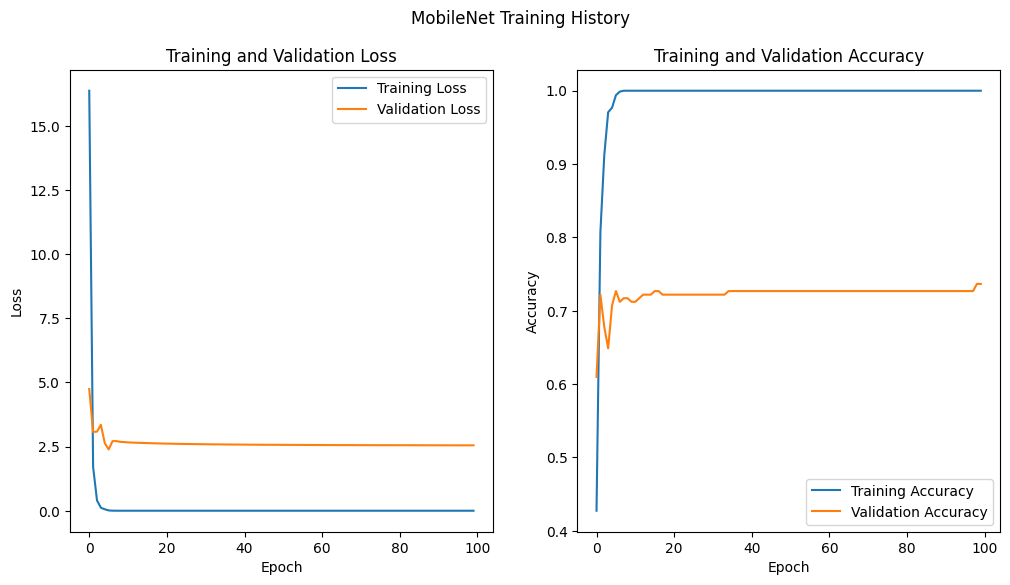

16705208/16705208 [==============================] - 1s 0us/step
EfficientNet
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 flatten_5 (Flatten)         (None, 81920)             0         
                                                                 
 dense_33 (Dense)            (None, 500)               40960500  
                                                                 
 dense_34 (Dense)            (None, 100)               50100     
                                                                 
 dense_35 (Dense)            (None, 4)                 404       
                                                                 
Total params: 45060575 (171.89 MB)
Trainab

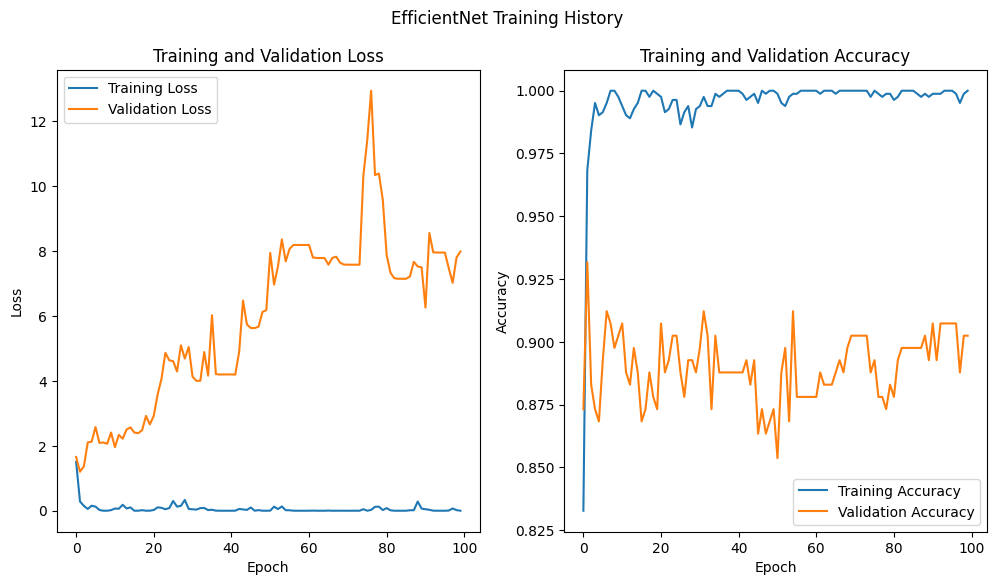

     model_name  last_train_accuracy  max_train_accuracy  \
0         VGG16                  1.0                 1.0   
1     Inception                  1.0                 1.0   
2        ResNet                  1.0                 1.0   
3     MobileNet                  1.0                 1.0   
4  EfficientNet                  1.0                 1.0   

   last_validation_accuracy  max_validation_accuracy  training_time  
0                  0.858537                 0.868293     587.614322  
1                  0.556098                 0.609756     308.864597  
2                  0.902439                 0.917073     421.742537  
3                  0.736585                 0.736585     154.970225  
4                  0.902439                 0.931707     267.024665  


In [7]:
# Define image size
img_size = (256, 256)
num_classes = 4
num_epochs = 100

# Function to load pretrained model
def load_model(model_name):
    if model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
    elif model_name == 'Inception':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
    elif model_name == 'ResNet':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
    elif model_name == 'MobileNet':
        base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
    elif model_name == 'EfficientNet':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
    else:
        raise ValueError("Invalid model name")

    return base_model

# Function to add custom top layers
def add_top_layers(base_model):
    model = Sequential([
        base_model,
        Flatten(),
        Dense(500, activation='relu'),
        Dense(100, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define models to evaluate
models_to_evaluate = ['VGG16', 'Inception', 'ResNet', 'MobileNet', 'EfficientNet']

# Initialize dataframe to record model performance
model_performance_df = pd.DataFrame(columns=['model_name', 'last_train_accuracy', 'max_train_accuracy',
                                             'last_validation_accuracy', 'max_validation_accuracy', 'training_time'])

# Loop over models
for model_name in models_to_evaluate:
    # Load pretrained model
    base_model = load_model(model_name)
    print(str(model_name))

    # Freeze convolutional base layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom top layers
    model = add_top_layers(base_model)

    # Compile the model
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Print model summary
    model.summary()

    # Record start time
    start_time = time.time()

    # Train the model
    history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_valid, y_valid), verbose=0)

    # Record end time
    end_time = time.time()

    # Calculate training time
    training_time = end_time - start_time

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.suptitle(f'{model_name} Training History')
    plt.show()

    # Record model performance
    last_train_accuracy = history.history['accuracy'][-1]
    max_train_accuracy = max(history.history['accuracy'])
    last_validation_accuracy = history.history['val_accuracy'][-1]
    max_validation_accuracy = max(history.history['val_accuracy'])

    # Create a new DataFrame with model performance data
    model_performance_data = pd.DataFrame([{'model_name': model_name,
                                             'last_train_accuracy': last_train_accuracy,
                                             'max_train_accuracy': max_train_accuracy,
                                             'last_validation_accuracy': last_validation_accuracy,
                                             'max_validation_accuracy': max_validation_accuracy,
                                             'training_time': training_time}])

    # Concatenate the new DataFrame with the existing one
    model_performance_df = pd.concat([model_performance_df, model_performance_data], ignore_index=True)

# Display model performance dataframe
print(model_performance_df)


In [8]:
model_performance_df

,model_name,last_train_accuracy,max_train_accuracy,last_validation_accuracy,max_validation_accuracy,training_time
0,VGG16,1.0,1.0,0.858537,0.868293,587.614322
1,Inception,1.0,1.0,0.556098,0.609756,308.864597
2,ResNet,1.0,1.0,0.902439,0.917073,421.742537
3,MobileNet,1.0,1.0,0.736585,0.736585,154.970225
4,EfficientNet,1.0,1.0,0.902439,0.931707,267.024665


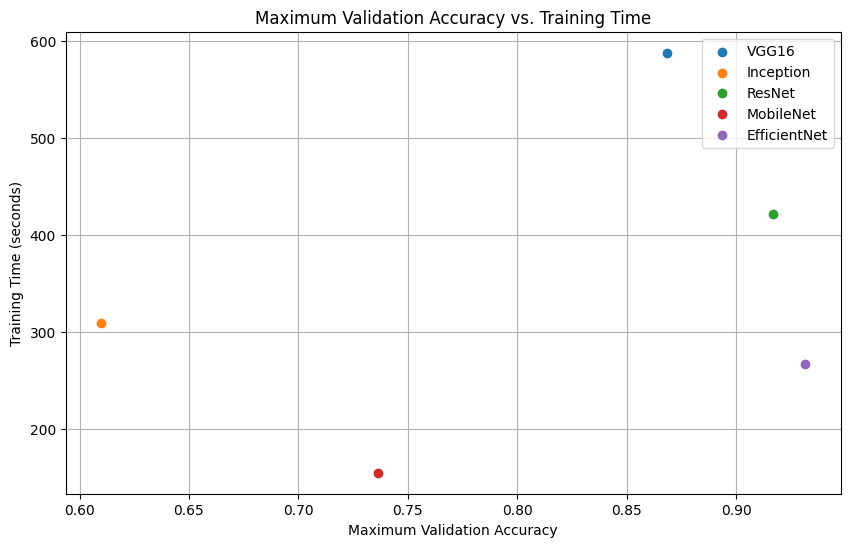

In [9]:
# Create scatter plot
plt.figure(figsize=(10, 6))
for index, row in model_performance_df.iterrows():
    plt.scatter(row['max_validation_accuracy'], row['training_time'], label=row['model_name'])

# Add labels and legend
plt.xlabel('Maximum Validation Accuracy')
plt.ylabel('Training Time (seconds)')
plt.title('Maximum Validation Accuracy vs. Training Time')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

As we can see from the reported loss and accuracy data, the models clearly benefit from transfer learning, a technique where a pre-trained model is repurposed for a new task. By leveraging knowledge learned from a large dataset, it achieves higher accuracy compared to models only trained on the provided small dataset. With transfer learning, in most cases, models reach convergence earlier because they can leverage knowledge learned from pre-trained models on large datasets, enabling them to quickly adapt to new tasks and learn relevant features with less training data.

If we examine the training time over 100 epochs and the achieved accuracy, we observe significant variance between the models. The most performing model is clearly EfficientNet, which achieves the highest validation accuracy with relatively low training time. This is possible due to its design, maintaining high accuracy while keeping the model lightweight, suitable for deployment on mobile devices as well. The second-best performing model is ResNet, with slightly lower accuracy but much higher training time. However, we can see that this model has a much lower risk of overfitting, as after a few epochs, the validation error stabilizes and does not increase over time, unlike EfficientNet. MobileNet is also noteworthy, producing acceptable accuracy in the shortest training time.

In conclusion, EfficientNet would work best in a real business scenario, as it is capable of delivering very high accuracy in a relatively short time.